In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cbook as cbook
import csv
import pylab
from scipy.interpolate import interp1d


np.set_printoptions(threshold=sys.maxsize)


In [2]:
time_list_size200 = []
dt_array_size200 = []
V_array_size200 = []
rhs_count_array_size200 = []
error_abs_psi_size200 = []
error_abs_S_size200 = []
error_rel_psi_size200 = []
error_rel_S_size200 = []
max_S_size200 = []
min_S_size200 = []
max_PSI_size200 = []
min_PSI_size200 = []
time_old = 0.0

#don't plot first two components
first = 1
second = 1

with open('../results/TANDEM_size200__AS_extendedode_5dp_Stol1e-06__EQ_extendedode_5dp_Stol1e-06.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if second:
            second = 0
        if first:
            first = 0
            second = 1
        else:
            time = row['time']
            dt = float(time) - time_old
            time_old = float(time)
            time_list_size200.append(time)
            dt_array_size200.append(dt)

            V_array_size200.append(row['Vmax'])
            max_S_size200.append(row['maxS'])
            min_S_size200.append(row['minS'])
            max_PSI_size200.append(row['maxPSI'])
            min_PSI_size200.append(row['minPSI'])

time_array_size200 = np.asarray(time_list_size200, dtype=np.float64)
dt_array_size200 = np.asarray(dt_array_size200, dtype=np.float64)
V_array_size200 = np.asarray(V_array_size200, dtype=np.float64)
max_S_size200 = np.asarray(max_S_size200, dtype=np.float64)
min_S_size200 = np.asarray(min_S_size200, dtype=np.float64)
max_PSI_size200 = np.asarray(max_PSI_size200, dtype=np.float64)
min_PSI_size200 = np.asarray(min_PSI_size200, dtype=np.float64)

time_years_size200 = time_array_size200 / (365.2425*24*3600)

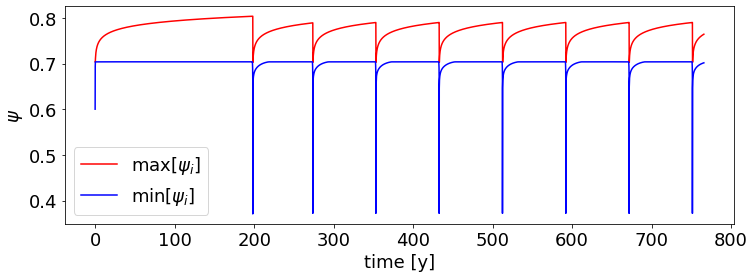

In [3]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_size200, max_PSI_size200,'-r', label =r'$\max[\psi_i]$')
plt.plot(time_years_size200, min_PSI_size200,'-b', label =r'$\min[\psi_i]$')

plt.xlabel("time [y]")
plt.ylabel(r'$\psi$')

plt.legend()

plt.savefig('../results/TANDEMtimeEvolution_MinMaxPSI_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()



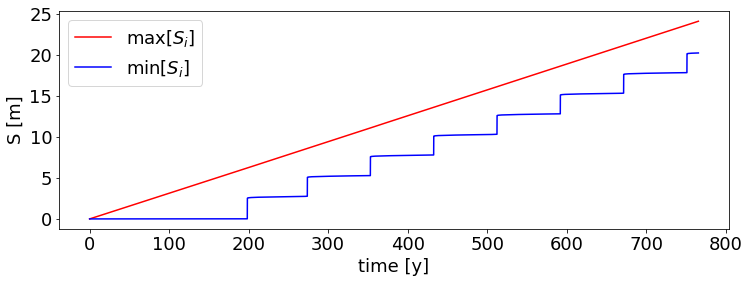

In [4]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_size200, max_S_size200,'-r', label =r'$\max[S_i]$')
plt.plot(time_years_size200, min_S_size200,'-b', label =r'$\min[S_i]$')

plt.xlabel("time [y]")
plt.ylabel("S [m]")

plt.legend()

plt.savefig('../results/TANDEMtimeEvolution_MinMaxS_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()



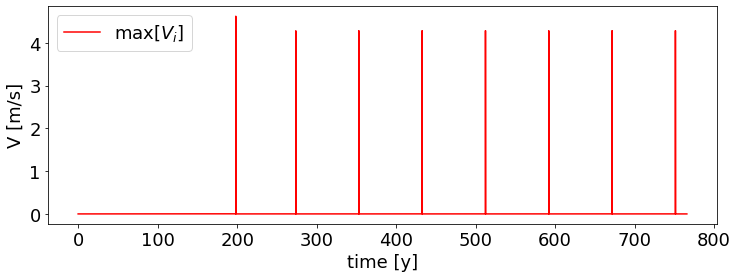

In [8]:
plt.figure(figsize=(12.00,4.00))
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

plt.plot(time_years_size200, V_array_size200,'-r', label =r'$\max[V_i]$')

plt.xlabel("time [y]")
plt.ylabel("V [m/s]")

plt.legend()

plt.savefig('../results/TANDEMtimeEvolution_MaxV_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()



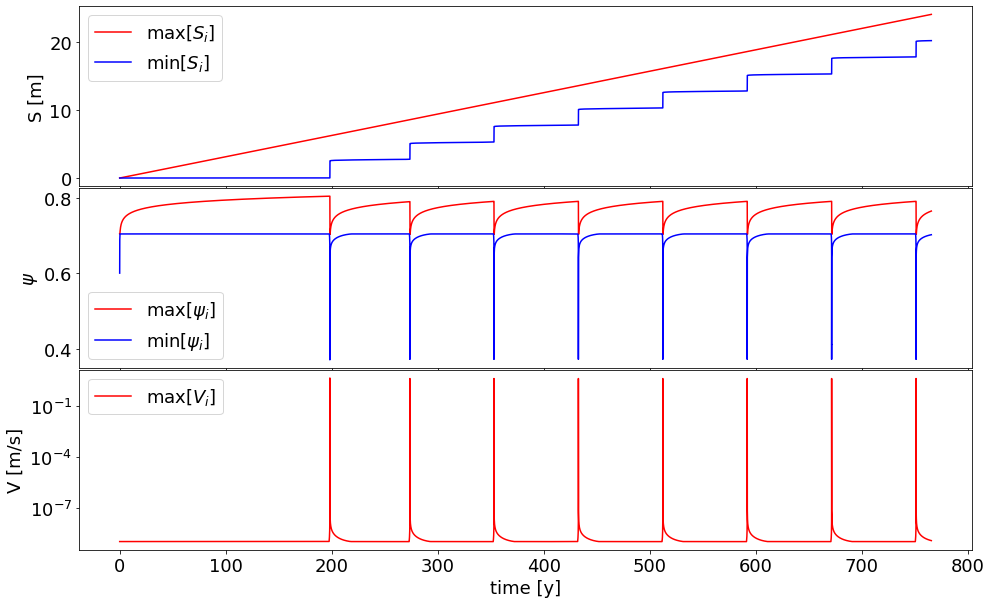

In [9]:
plt.rcParams.update({'font.size': 18})
params = {'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}']}
plt.rcParams.update(params)

fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, gridspec_kw={'hspace': 0.01},figsize=(16.00,10.00))

ax1.plot(time_years_size200, max_S_size200,'-r', label =r'$\max[S_i]$')
ax1.plot(time_years_size200, min_S_size200,'-b', label =r'$\min[S_i]$')
ax1.set_ylabel("S [m]")
ax1.legend()

ax2.plot(time_years_size200, max_PSI_size200,'-r', label =r'$\max[\psi_i]$')
ax2.plot(time_years_size200, min_PSI_size200,'-b', label =r'$\min[\psi_i]$')
ax2.set_ylabel(r'$\psi$')
ax2.legend()

ax3.plot(time_years_size200, V_array_size200,'-r', label =r'$\max[V_i]$')
ax3.set_xlabel("time [y]")
ax3.set_ylabel("V [m/s]")
ax3.set_yscale('log')
ax3.legend()

plt.savefig('../results/TANDEMtimeEvolution_MinMaxAllStacked_Size200_RKDP5_extendedODE.png', format='png',dpi=300)

plt.show()
